# PDI – Actividad Práctica

1. Dadas imágenes a niveles de gris, binarizarlas y comparar los resultados:

   * El resultado final tiene 50% de pixels negros y blancos.
   * Encontrar dos modas “clara” y “oscura” y binarizar por distancia mínima.
   * Binarización de Otsu.

2. En imágenes como la (a) encontrar los bordes aplicando Laplaciano, borde morfológico, marching squares.

3. En imágenes como la (b) implementar color fill con la “varita mágica”.

In [1]:
%matplotlib inline

import imageio
import numpy as np

import matplotlib.pyplot as plt

In [2]:
img_a = (imageio.imread('data/img2.png') / 255)[:,:,0]
img_b = (imageio.imread('data/img1.png') / 255)[:,:,0]

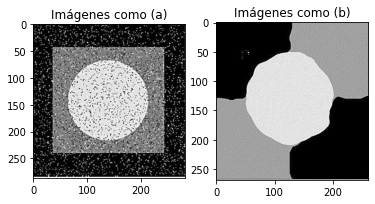

In [3]:
fig, axs = plt.subplots(nrows=1,ncols=2)
axs[0].imshow(img_a, cmap='gray')
axs[0].set_title("Imágenes como (a)")
axs[1].imshow(img_b,cmap='gray')
axs[1].set_title("Imágenes como (b)")

plt.show()

## Binarización

## El resultado final tiene 50% de píxeles negros y blancos

In [4]:
from histogramas import generate_luminance_histogram

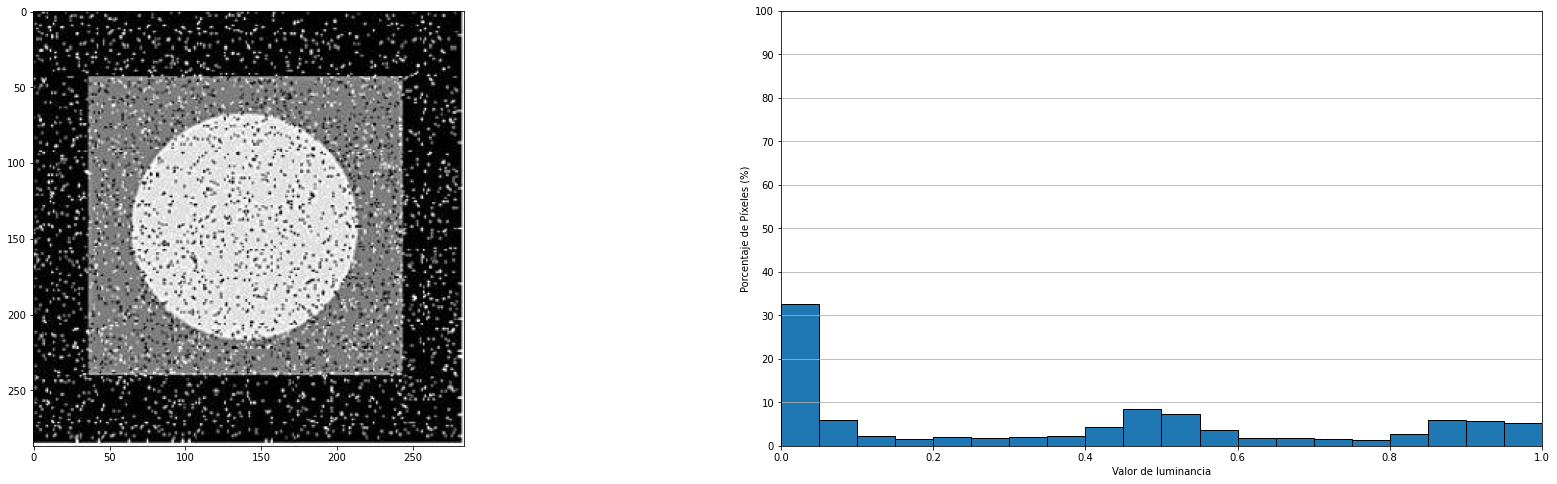

In [5]:
generate_luminance_histogram(img_a, n_intervals=[20])

In [6]:
def binarize(image, threshold=.5):
    copy = np.copy(image)
    
    copy[image >= threshold] = 1
    copy[image < threshold] = 0
    
    return copy

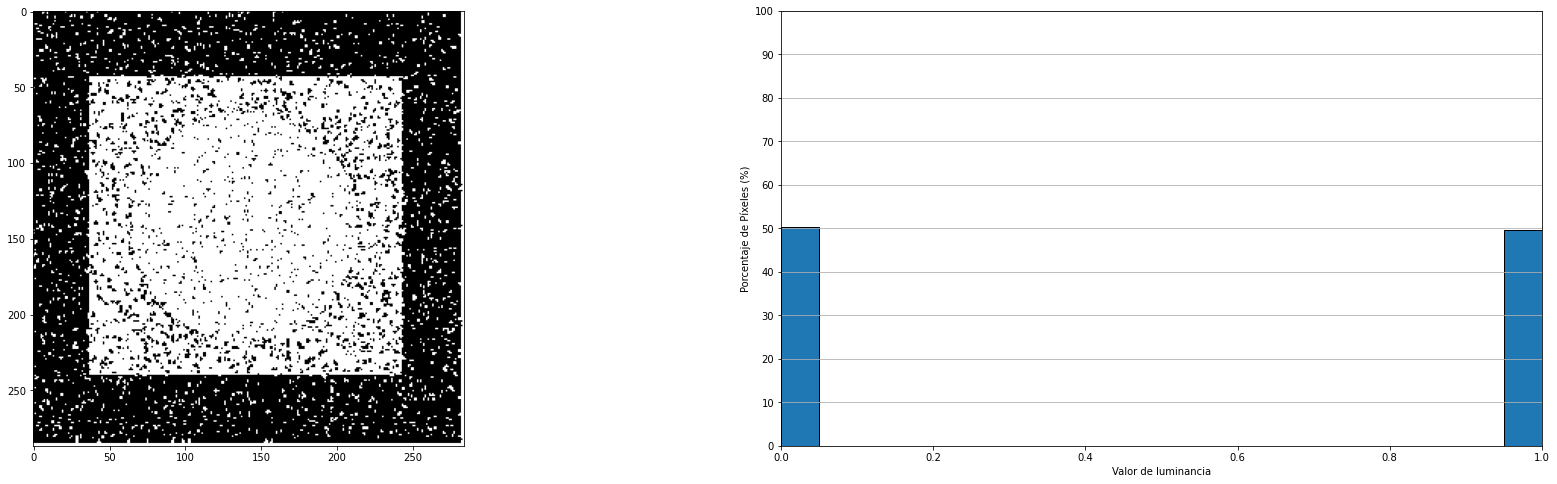

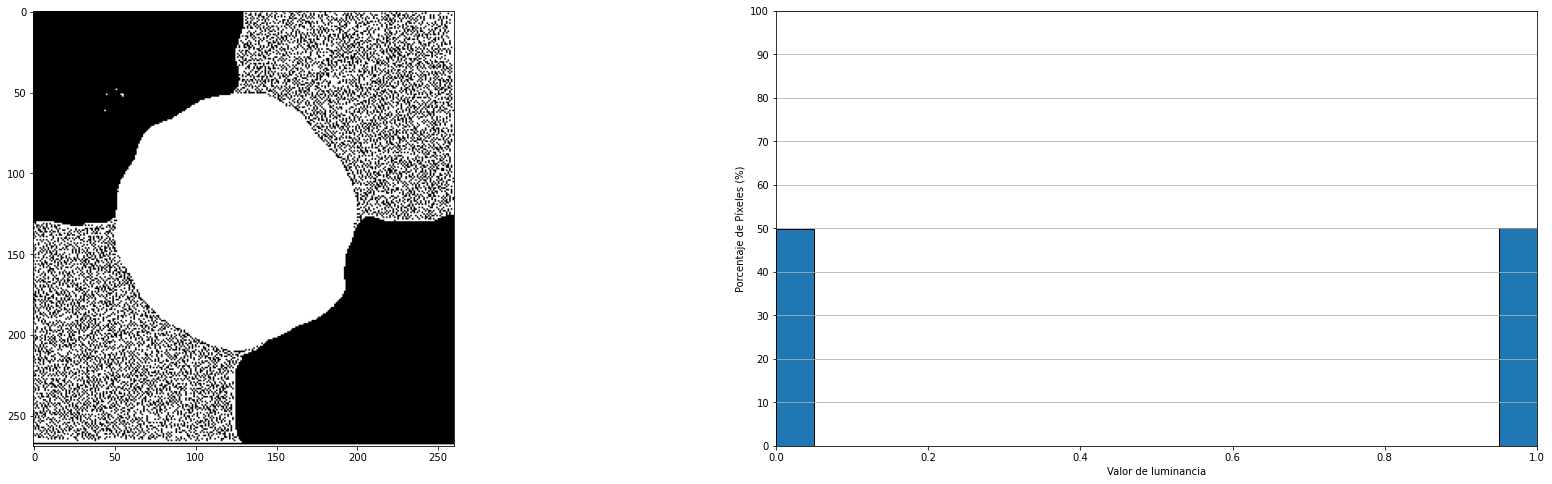

In [7]:
img_a_bin_50_50 = binarize(img_a, threshold=.4)
generate_luminance_histogram(img_a_bin_50_50, n_intervals=[20])
img_b_bin_50_50 = binarize(img_b, threshold=.6)
generate_luminance_histogram(img_b_bin_50_50, n_intervals=[20])

## Encontrar dos modas “clara” y “oscura” y binarizar por distancia mínima.

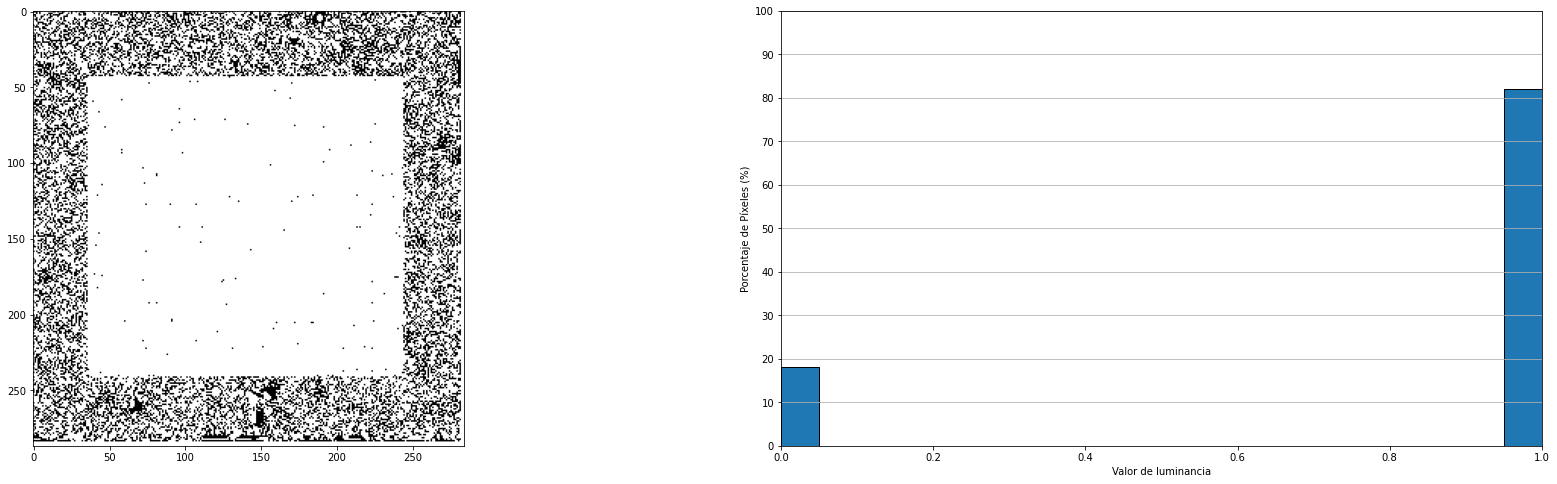

In [8]:
hist, bin_edges = np.histogram(img_a, bins=50)

# Bit rudimentary, but kinda works
(_,dark_mode), (_, bright_mode) = sorted([(n, bin_edge) for n, bin_edge in zip(hist, bin_edges)], key=lambda x: x[0], reverse=True)[:2]

mid_point = abs(dark_mode-bright_mode)/2

img_a_bin_min_distance = binarize(img_a, threshold=mid_point)
generate_luminance_histogram(img_a_bin_min_distance, n_intervals=[20])

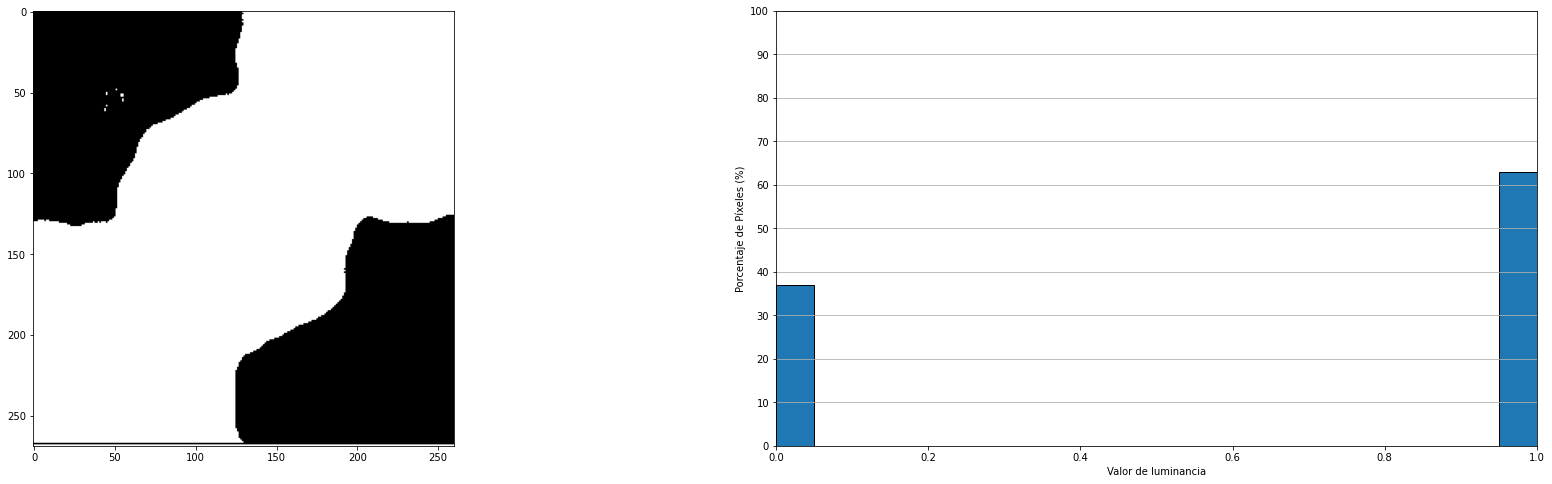

In [9]:
hist, bin_edges = np.histogram(img_b, bins=50)

# Bit rudimentary, but kinda works
(_,dark_mode), (_, bright_mode) = sorted([(n, bin_edge) for n, bin_edge in zip(hist, bin_edges)], key=lambda x: x[0], reverse=True)[:2]

mid_point = abs(dark_mode-bright_mode)/2

img_b_bin_min_distance = binarize(img_b, threshold=mid_point)
generate_luminance_histogram(img_b_bin_min_distance, n_intervals=[20])

## Binarización de Otsu

In [10]:
# Otsu https://en.wikipedia.org/wiki/Otsu%27s_method
def otsu(image, bins=256):
    
    otsus = []
    # minimizar F.var(F) + B.var(B)
    for t in range(bins):
        threshold = t/255
        foreground = image[image >= threshold]
        background = image[image < threshold]
        if len(foreground) == 0 or len(background)==0:
            continue
        varF = np.var(foreground)
        varB = np.var(background)
        value = np.sum(foreground) * varF + np.sum(background) * varB

        otsus.append((threshold,  value))
    
    return min(otsus, key=lambda x: x[1])[0]


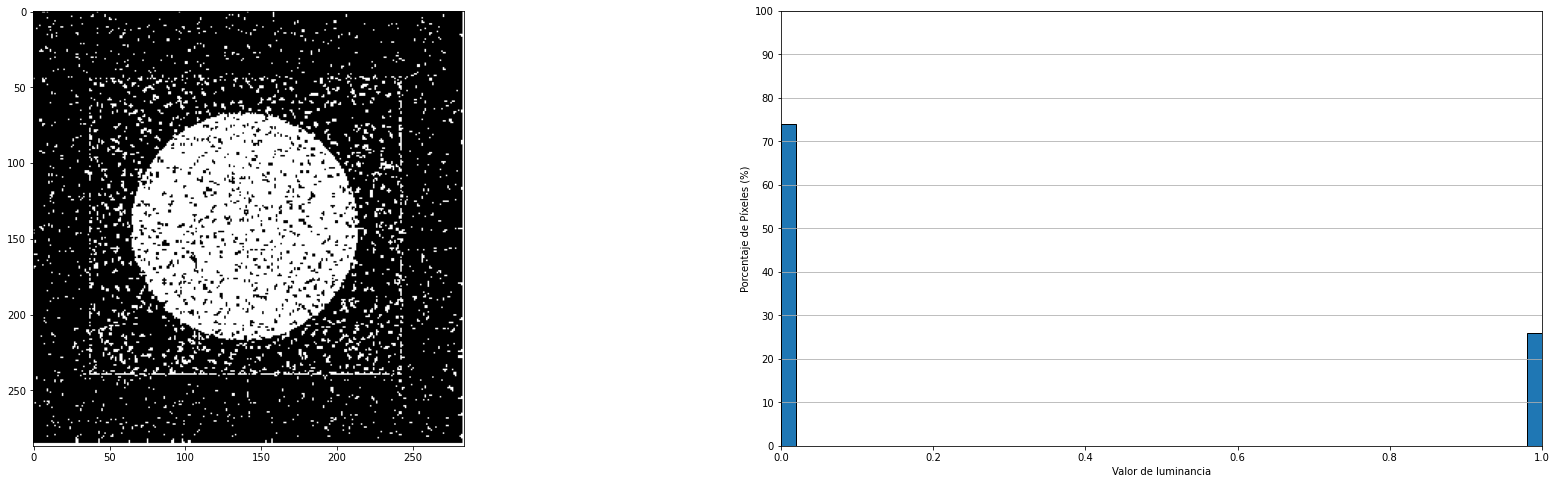

In [11]:
generate_luminance_histogram(
    binarize(
        img_a,
        threshold=otsu(img_a)),
    n_intervals=[50])

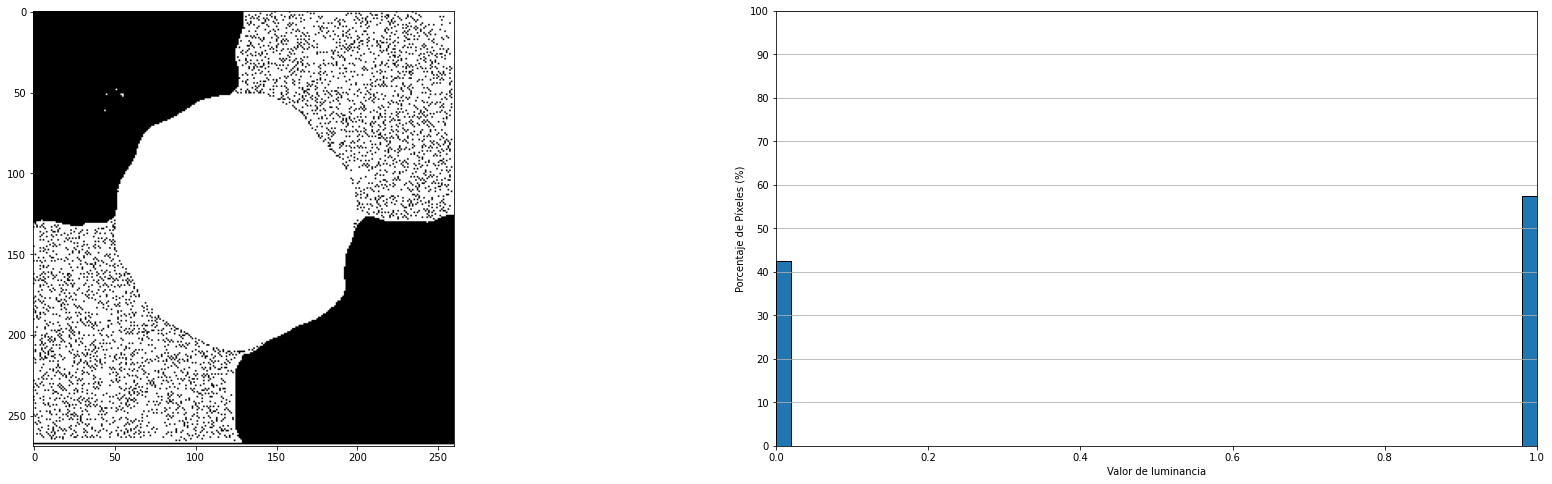

In [12]:
generate_luminance_histogram(
    binarize(
        img_b,
        threshold=otsu(img_b)
    ), n_intervals=[50])